In [157]:
from braket.tracking import Tracker
t = Tracker().start()

In [158]:
# general imports
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline
import string
import time

# AWS imports: Import Braket SDK modules
from braket.aws import AwsDevice, AwsQuantumTask
from braket.circuits import Circuit, Gate, observables
from braket.device_schema import DeviceActionType
from braket.devices import Devices, LocalSimulator
from braket.parametric import FreeParameter

In [159]:
# Define a circuit

nqubits=3
nlayers=3
nshots=2000

circ = Circuit()

circ.ry(0, 0)
circ.rz(0, 0.36959914)
circ.ry(1, 0.73919827)
circ.rz(1, 1.10879741)
circ.ry(2, 1.47839654)
circ.rz(2, 1.84799568)
circ.cnot(0, 1)
circ.cnot(1, 2)
circ.ry(0, 2.21759481)
circ.rz(0, 2.58719395)
circ.ry(1, 2.95679309)
circ.rz(1, 3.32639222)
circ.ry(2, 3.69599136)
circ.rz(2, 4.06559049)
circ.cnot(0, 1)
circ.cnot(1, 2)
circ.ry(0, 4.43518963)
circ.rz(0, 4.80478876)
circ.ry(1, 5.1743879)
circ.rz(1, 5.54398704)
circ.ry(2, 5.91358617)
circ.rz(2, 6.28318531)
circ.cnot(0, 1)
circ.cnot(1, 2)


Circuit('instructions': [Instruction('operator': Ry('angle': 0.0, 'qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Rz('angle': 0.36959914, 'qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Ry('angle': 0.73919827, 'qubit_count': 1), 'target': QubitSet([Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Rz('angle': 1.10879741, 'qubit_count': 1), 'target': QubitSet([Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Ry('angle': 1.47839654, 'qubit_count': 1), 'target': QubitSet([Qubit(2)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Rz('angle': 1.84799568, 'qubit_count': 1), 'target': QubitSet([Qubit(2)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubi

In [160]:
print(circ)

T  : │     0      │     1      │  2  │     3      │     4      │     5      │  6  │     7      │     8      │     9      │ 10  │ 11  │
       ┌───────┐   ┌──────────┐       ┌──────────┐ ┌──────────┐                    ┌──────────┐ ┌──────────┐                          
q0 : ──┤ Ry(0) ├───┤ Rz(0.37) ├───●───┤ Ry(2.22) ├─┤ Rz(2.59) ├────────────────●───┤ Ry(4.44) ├─┤ Rz(4.80) ├────────────────●─────────
       └───────┘   └──────────┘   │   └──────────┘ └──────────┘                │   └──────────┘ └──────────┘                │         
      ┌──────────┐ ┌──────────┐ ┌─┴─┐              ┌──────────┐ ┌──────────┐ ┌─┴─┐              ┌──────────┐ ┌──────────┐ ┌─┴─┐       
q1 : ─┤ Ry(0.74) ├─┤ Rz(1.11) ├─┤ X ├──────●───────┤ Ry(2.96) ├─┤ Rz(3.33) ├─┤ X ├──────●───────┤ Ry(5.17) ├─┤ Rz(5.54) ├─┤ X ├───●───
      └──────────┘ └──────────┘ └───┘      │       └──────────┘ └──────────┘ └───┘      │       └──────────┘ └──────────┘ └───┘   │   
      ┌──────────┐ ┌──────────┐          ┌─┴─┐     ┌───

In [161]:
# set up device: Local Simulator
device = LocalSimulator()

In [165]:
# run circuit (execute single TASK)
result = device.run(circ, shots=nshots).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'011': 631, '001': 531, '111': 406, '110': 130, '101': 121, '000': 96, '010': 55, '100': 30})


Counter({'011': 631, '001': 531, '111': 406, '110': 130, '101': 121, '000': 96, '010': 55, '100': 30})


Text(0, 0.5, 'counts')

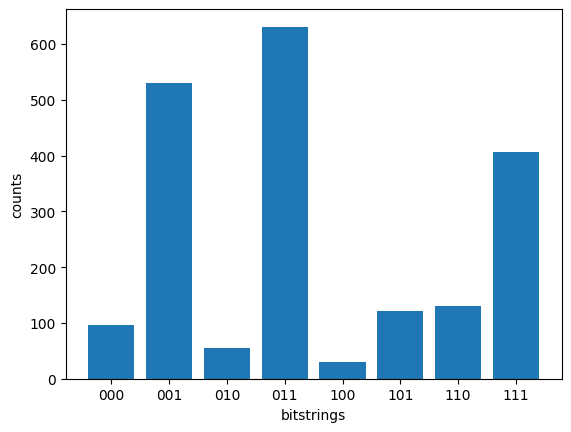

In [167]:
# plot using Counter

print(counts)
count = dict(sorted(counts.items(),key=lambda x:x[0]))

plt.bar(count.keys(), count.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')

In [169]:
obs_matrix = np.array([[-3.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-1.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-1.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,1.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-1.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,1.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,1.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,3.-0.j]])

def expectation_from_samples(obs, freq, qubit_map=None):
    if np.count_nonzero(obs - np.diag(np.diagonal(obs))) != 0:
        raise_error(NotImplementedError, "Observable is not diagonal.")
    keys = list(freq.keys())
    if qubit_map is None:
        qubit_map = list(range(int(np.log2(len(obs)))))
    counts = np.array(list(freq.values())) / sum(freq.values())
    expval = 0
    size = len(qubit_map)
    for j, k in enumerate(keys):
        index = 0
        for i in qubit_map:
            index += int(k[qubit_map.index(i)]) * 2 ** (size - 1 - i)
        expval += obs[index, index] * counts[j]
    return np.real(expval)

In [170]:
expectation_from_samples(obs_matrix, count)

0.5979999999999999